In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
column_names = ['name_of_surface_type', 'name_of_active_site_type']
for i in range(1,61):
    column_names.append('element_of_atom_'+str(i))
    column_names.append('CN_of_atom_'+str(i))
column_names.append('adsorption_energy')
data = pd.read_csv('journal_data/data.csv', names=column_names, header=None)

In [3]:
X_df = data.iloc[:, 0:122]
y_df = data.iloc[:, 122]

In [4]:
X_df = pd.get_dummies(X_df, columns=["name_of_surface_type", "name_of_active_site_type"]).astype(int)

In [5]:
X_array = X_df.to_numpy()
y_array = y_df.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, y_train)

# Use the trained model to predict the test data
y_pred = lr_model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Absolute Error: 0.06366276252873743
Mean Squared Error: 0.006651280427234785


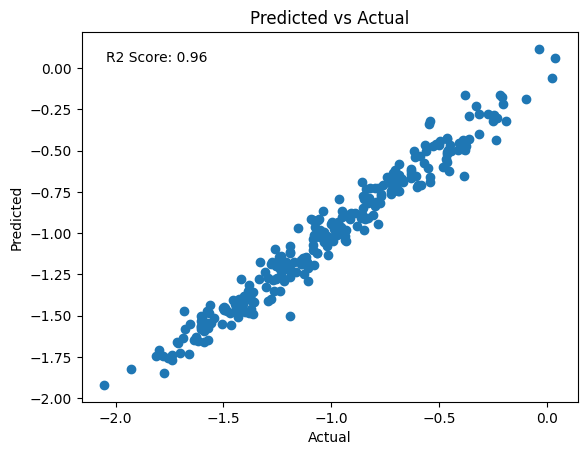

In [8]:
# Plot the predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Add the R2 score as a text annotation
plt.text(0.05, 0.95, f'R2 Score: {r2:.2f}', transform=plt.gca().transAxes, ha='left', va='top')

plt.show()
